In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models

In [48]:
data_dir = r"D:\Projects\potato project\archive (2)"

In [50]:
import os
print(os.listdir(data_dir))


['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']


In [52]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

data_dir = r"D:/Projects/potato project/archive (2)"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.
Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


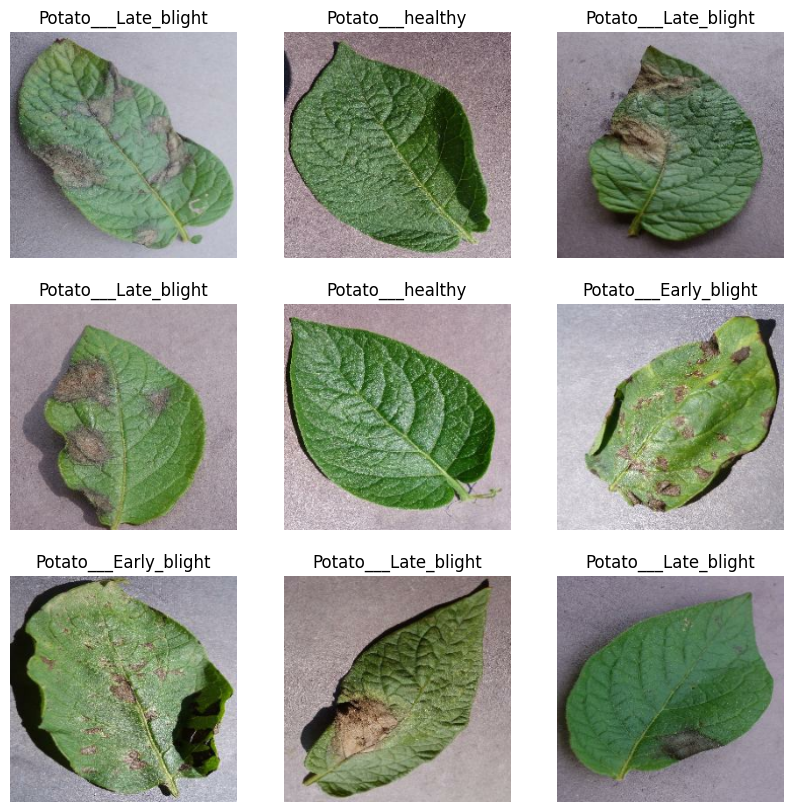

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


## 2. Image Dataset Cleaning and Preprocessing Validation


In [57]:
# ============================================================
# IMAGE DATA CLEANING PIPELINE
# Step 1 - count files
# Step 2 - detect corrupted images
# Step 3 - check image sizes
# Step 4 - detect non-image files
# Step 5 - class balance
# ============================================================

import os
from PIL import Image
from collections import defaultdict

data_dir = r"D:/Projects/potato project/archive (2)"
VALID_EXT = (".jpg", ".jpeg", ".png")

print("========= IMAGE DATA CLEANING =========\n")


# ============================================================
# STEP 1 — Count total files
# ============================================================

total_files = 0
for root, dirs, files in os.walk(data_dir):
    total_files += len(files)

print(f"Total files in dataset: {total_files}\n")


# ============================================================
# STEP 2 — Find corrupted / unreadable images
# ============================================================

corrupted_files = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        path = os.path.join(root, file)
        try:
            img = Image.open(path)
            img.verify()
        except Exception:
            corrupted_files.append(path)

print(f"Corrupted images found: {len(corrupted_files)}\n")


# ============================================================
# STEP 3 — Analyze image sizes
# ============================================================

sizes = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        path = os.path.join(root, file)
        try:
            img = Image.open(path)
            sizes.append(img.size)
        except:
            pass

if sizes:
    print("Sample image sizes:", sizes[:5])
    print("Min size:", min(sizes))
    print("Max size:", max(sizes))
print()


# ============================================================
# STEP 4 — Detect non-image files
# ============================================================

non_image_files = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if not file.lower().endswith(VALID_EXT):
            non_image_files.append(os.path.join(root, file))

print(f"Non-image files found: {len(non_image_files)}\n")


# ============================================================
# STEP 5 — Class distribution
# ============================================================

class_counts = defaultdict(int)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        class_counts[folder] = len(os.listdir(folder_path))

print("Images per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print("\n========================================")


========= IMAGE DATA CLEANING =========

Total files in dataset: 2152

Corrupted images found: 0

Sample image sizes: [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Min size: (256, 256)
Max size: (256, 256)

Non-image files found: 0

Images per class:
Potato___Early_blight: 1000
Potato___healthy: 152
Potato___Late_blight: 1000



## 3. EDA

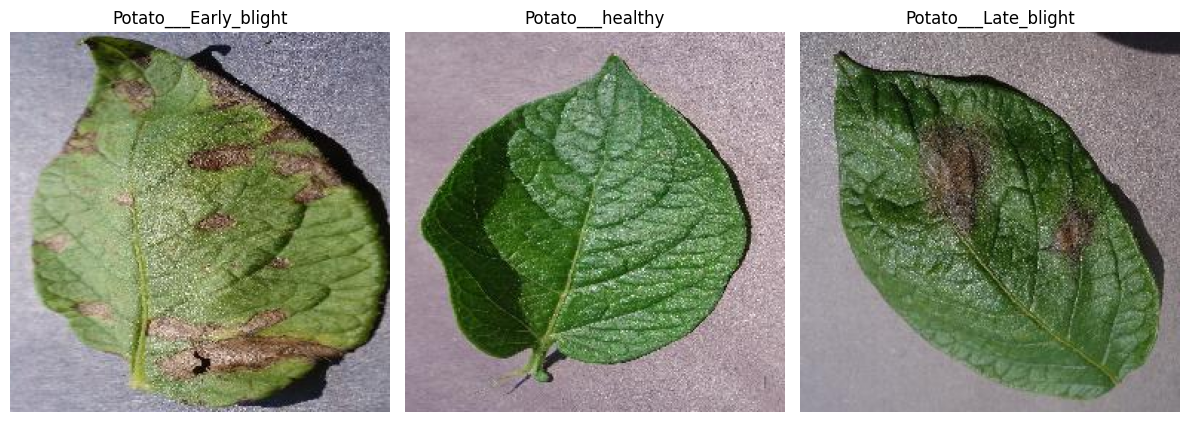

In [60]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os



plt.figure(figsize=(12,8))

for i, folder in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    
    # pick random image from class
    img_name = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_name)
    
    img = Image.open(img_path)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(folder)
    plt.axis("off")

plt.tight_layout()
plt.show()


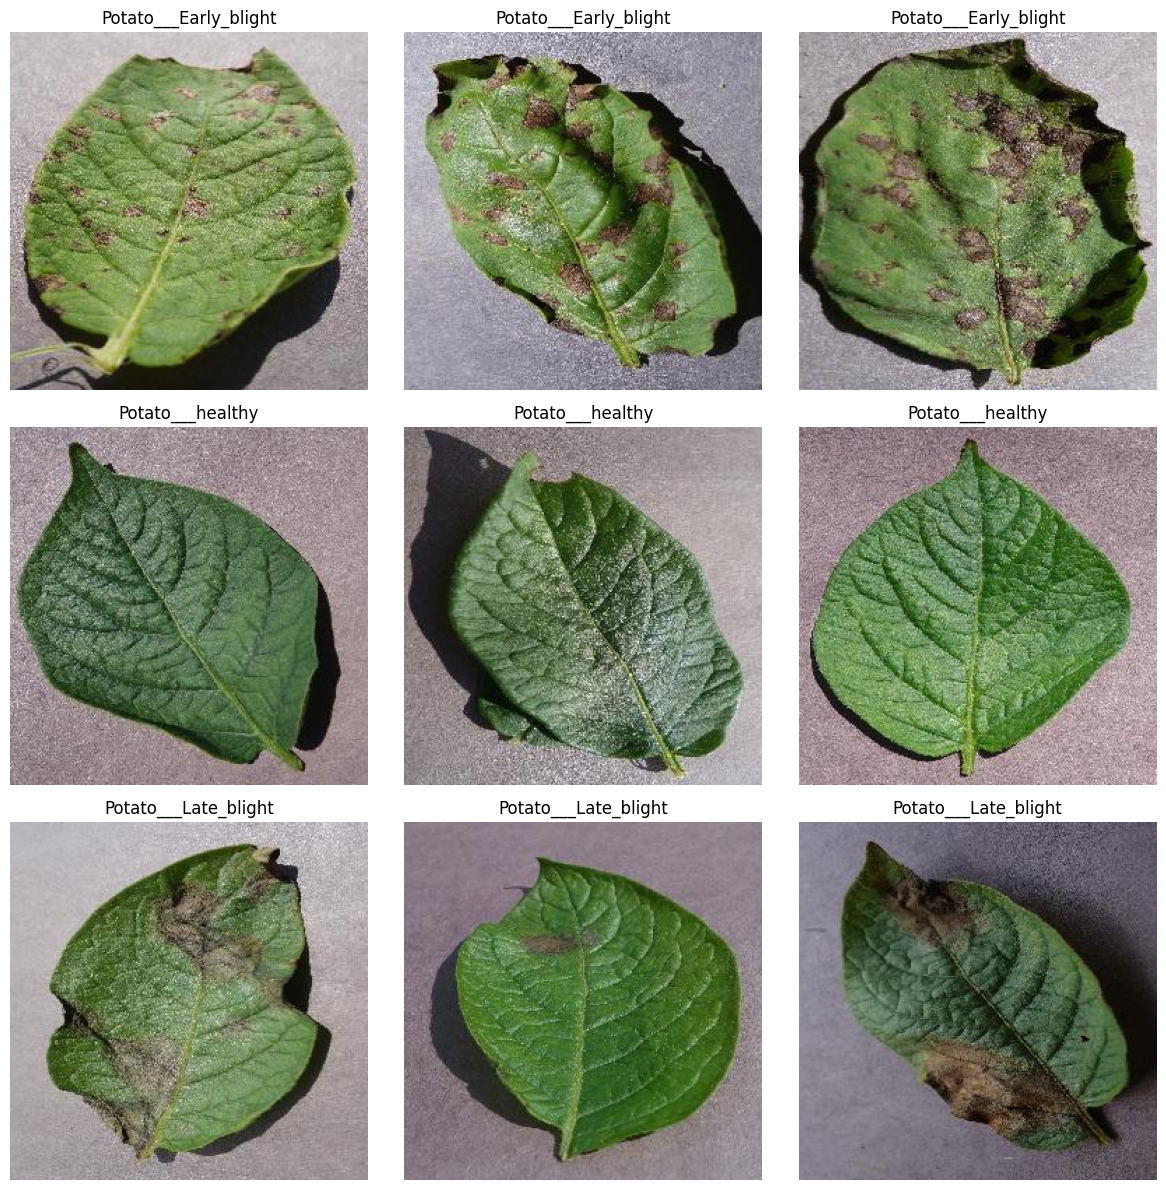

In [62]:
plt.figure(figsize=(12,12))

row = 1
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    
    for j in range(3):  # 3 images per class
        img_name = random.choice(os.listdir(folder_path))
        img_path = os.path.join(folder_path, img_name)
        
        img = Image.open(img_path)
        
        plt.subplot(3, 3, row)
        plt.imshow(img)
        plt.title(folder)
        plt.axis("off")
        row += 1

plt.tight_layout()
plt.show()


## 4. preprocessing and feature engineering

In [65]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


for images, labels in train_ds.take(1):
    print(tf.reduce_min(images).numpy())
    print(tf.reduce_max(images).numpy())


Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.
0.0
254.92346


## step 5 skipped for now cuz im going to use another dataset

## step 6 is augmentation

In [70]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
], name="augmentation")


## step 7 Model Architecture Selection

In [73]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

num_classes = len(class_names)

# pretrained feature extractor
base_model = EfficientNetB0(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

# freeze knowledge initially
base_model.trainable = False


model = tf.keras.Sequential([
    layers.Input(shape=(224,224,3)),

    data_augmentation,                 # apply random transforms
    layers.Lambda(preprocess_input),  # correct scaling

    base_model,

    layers.GlobalAveragePooling2D(),

    # stronger classifier head
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation="softmax")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,379,302 (16.71 MB)

 Trainable params: 329,219 (1.26 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

In [75]:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = np.concatenate([y for x, y in train_ds], axis=0)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.7017114914425427), 1: np.float64(0.7247474747474747), 2: np.float64(5.125)}


## step 9 model training

In [77]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)


callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks,
    class_weight=class_weights
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.5459 - loss: 1.0937 - val_accuracy: 0.8930 - val_loss: 0.6101
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7503 - loss: 0.5786 - val_accuracy: 0.9349 - val_loss: 0.3932
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7979 - loss: 0.4482 - val_accuracy: 0.9488 - val_loss: 0.2588
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8461 - loss: 0.3269 - val_accuracy: 0.9721 - val_loss: 0.1864
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8688 - loss: 0.2848 - val_accuracy: 0.9651 - val_loss: 0.1631
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8751 - loss: 0.2761 - val_accuracy: 0.9442 - val_loss: 0.1701
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9013 - loss: 0.2438 - val_accuracy: 0.9674 - val_loss: 0.1129
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8978 - loss: 0.2245 - val_accuracy: 0.9698 - val_loss

In [79]:
preds = model.predict(val_ds)
np.argmax(preds[:20], axis=1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step 


array([0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2])

In [81]:
model.evaluate(val_ds)


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 967ms/step - accuracy: 0.9860 - loss: 0.0380


[0.03802355006337166, 0.9860464930534363]

## step 10 Evaluation

In [84]:
import numpy as np

pred_probs = model.predict(val_ds)
y_pred = np.argmax(pred_probs, axis=1)

y_true = np.concatenate([y for x, y in val_ds], axis=0)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix")
print(cm)

print("\nClassification Report")
print(classification_report(y_true, y_pred))




14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
Confusion Matrix
[[181   0   1]
 [  0 205   3]
 [  0   2  38]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       182
           1       0.99      0.99      0.99       208
           2       0.90      0.95      0.93        40

    accuracy                           0.99       430
   macro avg       0.97      0.98      0.97       430
weighted avg       0.99      0.99      0.99       430



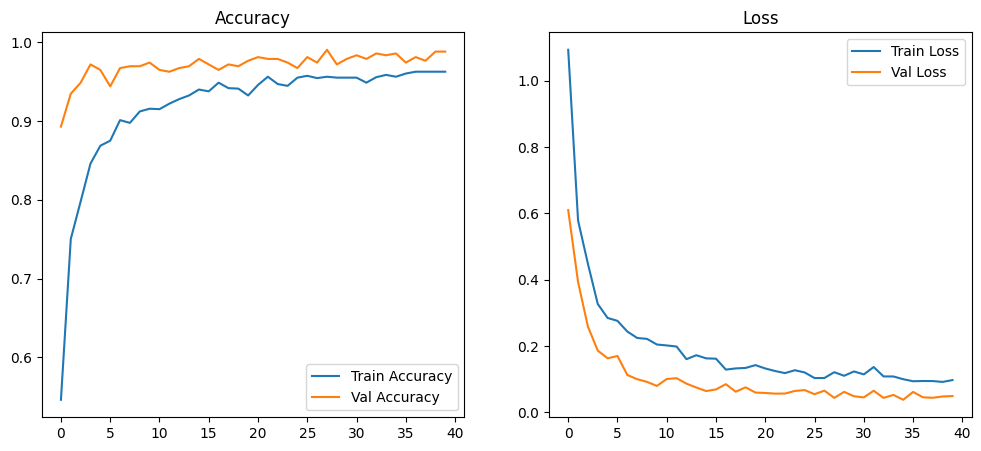

In [92]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [96]:
model.save("potato_disease_model.keras")


## code to load it later)


In [100]:
'''from tensorflow.keras.models import load_model
model = load_model("potato_disease_model.keras")'''

'from tensorflow.keras.models import load_model\nmodel = load_model("potato_disease_model.keras")'